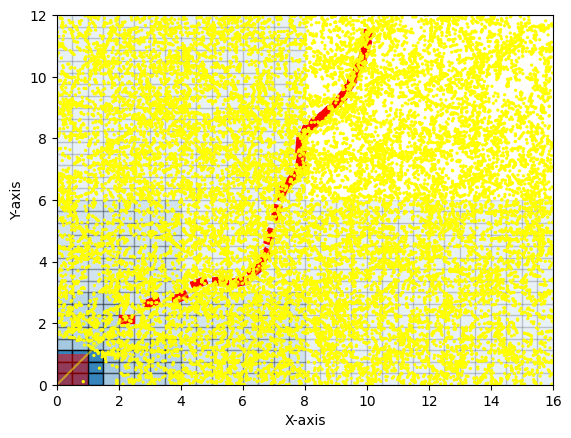

In [3]:
import matplotlib.pyplot as plt

# Open the text file
with open('../output.txt', 'r') as f:
    # read name
    name = f.readline()
    planner = f.readline()
    f.readline() # skip the new line after map
    
    # read obstacles
    obstacles = []
    while True:
        if (line := f.readline()) == "\n": break
        x, y, x_extent, y_extent = map(float, line.strip().split(','))
        obstacles.append((x, y, x_extent, y_extent))
    
    # read rectangles
    rectangles = []
    while True:
        if (line := f.readline()) == "\n": break
        x, x_extent, y, y_extent, h_value = map(float, line.strip().split(','))
        rectangles.append((x, x_extent, y, y_extent, h_value))
    
    dots = []
    while True:
        if (line := f.readline()) == "\n": break
        x, y, v, theta, psi = map(float, line.strip().split(','))
        dots.append((x,y,theta))
    
    nodes = []
    for line in f.readlines():
        x, y= map(float, line.strip().split(','))
        nodes.append((x,y))

# Create a figure and axis object
fig, ax = plt.subplots()

# Draw each rectangle on the axis
for rect in rectangles:
    x, x_extent, y, y_extent, h_value = rect
    try:
        ax.add_patch(
            plt.Rectangle((x, y), x_extent, y_extent, alpha=h_value/10, edgecolor='black')
        )
    except ValueError:
        ax.add_patch(
            plt.Rectangle((x, y), x_extent, y_extent, alpha=1, edgecolor='black')
        )

for obs in obstacles:
    x, y, x_extent, y_extent = obs
    ax.add_patch(
        plt.Rectangle((x, y), x_extent, y_extent, alpha=0.5, facecolor='red')
    )
prev_x = 0
prev_y = 0
for dot in dots:
    x, y, theta = dot
    ax.add_patch(
        plt.Rectangle((x, y), 0.5, 0.25, angle= theta/3.14 * 180 , alpha=1,  color='red')
    )
    plt.plot([prev_x, x], [prev_y, y], color='yellow', alpha=0.5)
    prev_x = x
    prev_y = y
for node in nodes:
    x, y = node
    ax.add_patch(
          plt.Circle((x, y), 0.03, color='yellow')
    )
    if x < 0:
        print("Wrong")

# Set the axis limits and labels
ax.set_xlim(0, 16)
ax.set_ylim(0, 12)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Show the plot
# plt.show()
plt.savefig(f"../fig/{planner}.jpg")
